### Imports 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import regex as re
from collections import Counter
from nltk.corpus import stopwords
import emoji

In [2]:
sub_df=pd.read_csv('sub_df.csv')
sub_df

,Unnamed: 0,created,author,title,url
0,0,2020-12-29 23:55:35,WallStWarlock,GME sign from the QUAZAR.,https://i.redd.it/dq3xofxnh7861.png
1,1,2020-12-29 23:27:43,Cali_Godbod,5th trade: GME Gang rise up,https://www.reddit.com/r/wallstreetbets/commen...
2,2,2020-12-29 23:23:24,Blitz100000,How much to invest in GME and PLTR,https://www.reddit.com/r/wallstreetbets/commen...
3,3,2020-12-29 23:08:23,kunjinn,"Yesterday I was celebrating, today I am in the...",https://www.reddit.com/gallery/kmo6ck
4,4,2020-12-29 22:45:43,Effect_Wild,"GME DD, look at all the out of stock stickers ...",https://i.redd.it/6snwzo3857861.jpg
...,...,...,...,...,...
76347,76347,2021-02-08 00:38:50,nxb123,How 75% of GME Shares Are Still Shorted. S3 is...,https://www.reddit.com/r/wallstreetbets/commen...
76348,76348,2021-02-08 00:36:52,villadejer,"soo anyways? BUY and HOLD AMC, GME tomorrow?",https://www.reddit.com/r/wallstreetbets/commen...
76349,76349,2021-02-08 00:24:19,LuxeZode,What was the real point of GME and AMC?,https://www.reddit.com/r/wallstreetbets/commen...
76350,76350,2021-02-08 00:23:25,zakus5599,Regardless of the diamond hands or loss porn I...,https://www.reddit.com/r/wallstreetbets/commen...


#### Make every character lower case and remove comma, dot and question marks 

In [3]:
sub_df['title']=sub_df['title'].str.lower()
sub_df

,Unnamed: 0,created,author,title,url
0,0,2020-12-29 23:55:35,WallStWarlock,gme sign from the quazar.,https://i.redd.it/dq3xofxnh7861.png
1,1,2020-12-29 23:27:43,Cali_Godbod,5th trade: gme gang rise up,https://www.reddit.com/r/wallstreetbets/commen...
2,2,2020-12-29 23:23:24,Blitz100000,how much to invest in gme and pltr,https://www.reddit.com/r/wallstreetbets/commen...
3,3,2020-12-29 23:08:23,kunjinn,"yesterday i was celebrating, today i am in the...",https://www.reddit.com/gallery/kmo6ck
4,4,2020-12-29 22:45:43,Effect_Wild,"gme dd, look at all the out of stock stickers ...",https://i.redd.it/6snwzo3857861.jpg
...,...,...,...,...,...
76347,76347,2021-02-08 00:38:50,nxb123,how 75% of gme shares are still shorted. s3 is...,https://www.reddit.com/r/wallstreetbets/commen...
76348,76348,2021-02-08 00:36:52,villadejer,"soo anyways? buy and hold amc, gme tomorrow?",https://www.reddit.com/r/wallstreetbets/commen...
76349,76349,2021-02-08 00:24:19,LuxeZode,what was the real point of gme and amc?,https://www.reddit.com/r/wallstreetbets/commen...
76350,76350,2021-02-08 00:23:25,zakus5599,regardless of the diamond hands or loss porn i...,https://www.reddit.com/r/wallstreetbets/commen...


In [4]:
sub_df['title']=sub_df['title'].str.replace('?','')
sub_df['title']=sub_df['title'].str.replace('.','')
sub_df['title']=sub_df['title'].str.replace(',','')
sub_df

<ipython-input-4-cabe15a2c1db>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  sub_df['title']=sub_df['title'].str.replace('?','')
<ipython-input-4-cabe15a2c1db>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  sub_df['title']=sub_df['title'].str.replace('.','')


,Unnamed: 0,created,author,title,url
0,0,2020-12-29 23:55:35,WallStWarlock,gme sign from the quazar,https://i.redd.it/dq3xofxnh7861.png
1,1,2020-12-29 23:27:43,Cali_Godbod,5th trade: gme gang rise up,https://www.reddit.com/r/wallstreetbets/commen...
2,2,2020-12-29 23:23:24,Blitz100000,how much to invest in gme and pltr,https://www.reddit.com/r/wallstreetbets/commen...
3,3,2020-12-29 23:08:23,kunjinn,yesterday i was celebrating today i am in the ...,https://www.reddit.com/gallery/kmo6ck
4,4,2020-12-29 22:45:43,Effect_Wild,gme dd look at all the out of stock stickers 🚀🚀🚀🚀,https://i.redd.it/6snwzo3857861.jpg
...,...,...,...,...,...
76347,76347,2021-02-08 00:38:50,nxb123,how 75% of gme shares are still shorted s3 is ...,https://www.reddit.com/r/wallstreetbets/commen...
76348,76348,2021-02-08 00:36:52,villadejer,soo anyways buy and hold amc gme tomorrow,https://www.reddit.com/r/wallstreetbets/commen...
76349,76349,2021-02-08 00:24:19,LuxeZode,what was the real point of gme and amc,https://www.reddit.com/r/wallstreetbets/commen...
76350,76350,2021-02-08 00:23:25,zakus5599,regardless of the diamond hands or loss porn i...,https://www.reddit.com/r/wallstreetbets/commen...


#### Remove stopwords from the column title 

In [5]:
# first create a list of stopwords
stop=stopwords.words('english')

In [6]:
# apply a lamba function to the column 'title' to remove the stopwords
sub_df['title']=sub_df['title'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
sub_df

,Unnamed: 0,created,author,title,url
0,0,2020-12-29 23:55:35,WallStWarlock,gme sign quazar,https://i.redd.it/dq3xofxnh7861.png
1,1,2020-12-29 23:27:43,Cali_Godbod,5th trade: gme gang rise,https://www.reddit.com/r/wallstreetbets/commen...
2,2,2020-12-29 23:23:24,Blitz100000,much invest gme pltr,https://www.reddit.com/r/wallstreetbets/commen...
3,3,2020-12-29 23:08:23,kunjinn,yesterday celebrating today gutter margin used...,https://www.reddit.com/gallery/kmo6ck
4,4,2020-12-29 22:45:43,Effect_Wild,gme dd look stock stickers 🚀🚀🚀🚀,https://i.redd.it/6snwzo3857861.jpg
...,...,...,...,...,...
76347,76347,2021-02-08 00:38:50,nxb123,75% gme shares still shorted s3 wrong,https://www.reddit.com/r/wallstreetbets/commen...
76348,76348,2021-02-08 00:36:52,villadejer,soo anyways buy hold amc gme tomorrow,https://www.reddit.com/r/wallstreetbets/commen...
76349,76349,2021-02-08 00:24:19,LuxeZode,real point gme amc,https://www.reddit.com/r/wallstreetbets/commen...
76350,76350,2021-02-08 00:23:25,zakus5599,regardless diamond hands loss porn love commun...,https://www.reddit.com/r/wallstreetbets/commen...


to do this, if there is the prescence at least once in the title of an emoji it will be converted into the corresponding wsb lingo. For istances like 'paper hands' or 'diamond hands' or 'to the moon' it will be sufficient the presence of at least one of the emojis

#### convert the column 'title' into a list and then use Counter

In [7]:
a=sub_df['title'].to_list()
a

['gme sign quazar',
 '5th trade: gme gang rise',
 'much invest gme pltr',
 'yesterday celebrating today gutter margin used gme pltr psth mt',
 'gme dd look stock stickers 🚀🚀🚀🚀',
 'gme 12629 yolo shares position 🚀',
 'precisely portfolio today f*ck cost basis sold baba low buy dip fact even buy arkg gme crsr dip i’m true short bus autist buy high sell low wsb way',
 'gme brothers honor holding strong guys see tendie land',
 'buy dip retards gme gonna 🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀 might wanna stick diamonds hands ride',
 'gme earnings q4 going insane',
 'see lot 🚀 posts gme here’s plan i’ll wait get fomo invest 90% capital high sell low need cash rent',
 'formal gme exit price &amp; strategy',
 'see lot posts gme plan get fomo buy high 90% capital sell low need money rent',
 'fellow wsb retards waiting outside gme buy $15 power memberships',
 'seeing words “unusual options activity”gives hard 💎✋ gme 🚀🌕',
 'dont care takes need 12/31 20c gme money',
 'new gme price target stimmys can’t go tits gme 

In [8]:
a=[i.split(' ', 1)[0] for i in a]
a

['gme',
 '5th',
 'much',
 'yesterday',
 'gme',
 'gme',
 'precisely',
 'gme',
 'buy',
 'gme',
 'see',
 'formal',
 'see',
 'fellow',
 'seeing',
 'dont',
 'new',
 'gme',
 'hold',
 'gme',
 'gme',
 'virgin',
 '12/31',
 'gme',
 'i’ve',
 'gme',
 'gme',
 'wsb',
 'maybe',
 'gme',
 'hole',
 'gme',
 'gme',
 'people',
 'buy',
 'gme',
 'stop',
 'gme',
 'gme',
 'waiting',
 'gme',
 'gme',
 'gme',
 'gme',
 'retards',
 'gme',
 'gme',
 'minimize',
 'gme',
 'wsb',
 'gme',
 '🚀🚀',
 'technical',
 'gme',
 'stop',
 'big',
 'whats',
 "what's",
 'chicken',
 'gme',
 'gme',
 'devils',
 'good',
 'gme',
 'gme',
 'brains',
 "i'm",
 'someone',
 'amc',
 'guy',
 'don’t',
 'gme',
 'proof',
 'gme',
 'gme',
 'gme',
 'that’s',
 'that’s',
 'importance',
 'gme',
 'depth',
 'gme',
 'gme',
 'gme',
 'gamestop',
 'gme',
 'yolo',
 'part',
 '4th',
 'gme',
 'gme',
 'gme',
 'mr',
 'mr',
 'mr',
 'help',
 'gme',
 'help',
 'yolo',
 'gme',
 'current',
 'gme',
 'gme',
 'gme',
 'gme',
 'gme',
 'gme',
 'gme',
 'gme',
 'boys',
 'gme',
 'nee

In [9]:
b=[i.split('/',)[0] for i in a]
b

['gme',
 '5th',
 'much',
 'yesterday',
 'gme',
 'gme',
 'precisely',
 'gme',
 'buy',
 'gme',
 'see',
 'formal',
 'see',
 'fellow',
 'seeing',
 'dont',
 'new',
 'gme',
 'hold',
 'gme',
 'gme',
 'virgin',
 '12',
 'gme',
 'i’ve',
 'gme',
 'gme',
 'wsb',
 'maybe',
 'gme',
 'hole',
 'gme',
 'gme',
 'people',
 'buy',
 'gme',
 'stop',
 'gme',
 'gme',
 'waiting',
 'gme',
 'gme',
 'gme',
 'gme',
 'retards',
 'gme',
 'gme',
 'minimize',
 'gme',
 'wsb',
 'gme',
 '🚀🚀',
 'technical',
 'gme',
 'stop',
 'big',
 'whats',
 "what's",
 'chicken',
 'gme',
 'gme',
 'devils',
 'good',
 'gme',
 'gme',
 'brains',
 "i'm",
 'someone',
 'amc',
 'guy',
 'don’t',
 'gme',
 'proof',
 'gme',
 'gme',
 'gme',
 'that’s',
 'that’s',
 'importance',
 'gme',
 'depth',
 'gme',
 'gme',
 'gme',
 'gamestop',
 'gme',
 'yolo',
 'part',
 '4th',
 'gme',
 'gme',
 'gme',
 'mr',
 'mr',
 'mr',
 'help',
 'gme',
 'help',
 'yolo',
 'gme',
 'current',
 'gme',
 'gme',
 'gme',
 'gme',
 'gme',
 'gme',
 'gme',
 'gme',
 'boys',
 'gme',
 'need',

In [10]:
unwanted_char = str.maketrans("", "", '!@#"/)(*')
my_b = [s.translate(unwanted_char) for s in b]
my_b

['gme',
 '5th',
 'much',
 'yesterday',
 'gme',
 'gme',
 'precisely',
 'gme',
 'buy',
 'gme',
 'see',
 'formal',
 'see',
 'fellow',
 'seeing',
 'dont',
 'new',
 'gme',
 'hold',
 'gme',
 'gme',
 'virgin',
 '12',
 'gme',
 'i’ve',
 'gme',
 'gme',
 'wsb',
 'maybe',
 'gme',
 'hole',
 'gme',
 'gme',
 'people',
 'buy',
 'gme',
 'stop',
 'gme',
 'gme',
 'waiting',
 'gme',
 'gme',
 'gme',
 'gme',
 'retards',
 'gme',
 'gme',
 'minimize',
 'gme',
 'wsb',
 'gme',
 '🚀🚀',
 'technical',
 'gme',
 'stop',
 'big',
 'whats',
 "what's",
 'chicken',
 'gme',
 'gme',
 'devils',
 'good',
 'gme',
 'gme',
 'brains',
 "i'm",
 'someone',
 'amc',
 'guy',
 'don’t',
 'gme',
 'proof',
 'gme',
 'gme',
 'gme',
 'that’s',
 'that’s',
 'importance',
 'gme',
 'depth',
 'gme',
 'gme',
 'gme',
 'gamestop',
 'gme',
 'yolo',
 'part',
 '4th',
 'gme',
 'gme',
 'gme',
 'mr',
 'mr',
 'mr',
 'help',
 'gme',
 'help',
 'yolo',
 'gme',
 'current',
 'gme',
 'gme',
 'gme',
 'gme',
 'gme',
 'gme',
 'gme',
 'gme',
 'boys',
 'gme',
 'need',

In [11]:
counts = Counter(my_b)
counts

Counter({'gme': 18768,
         '5th': 2,
         'much': 134,
         'yesterday': 18,
         'precisely': 1,
         'buy': 2168,
         'see': 89,
         'formal': 1,
         'fellow': 123,
         'seeing': 38,
         'dont': 204,
         'new': 410,
         'hold': 1170,
         'virgin': 3,
         '12': 5,
         'i’ve': 75,
         'wsb': 303,
         'maybe': 18,
         'hole': 1,
         'people': 202,
         'stop': 206,
         'waiting': 57,
         'retards': 73,
         'minimize': 1,
         '🚀🚀': 11,
         'technical': 22,
         'big': 83,
         'whats': 64,
         "what's": 106,
         'chicken': 1,
         'devils': 1,
         'good': 113,
         'brains': 3,
         "i'm": 478,
         'someone': 353,
         'amc': 1011,
         'guy': 36,
         'don’t': 242,
         'proof': 38,
         'that’s': 14,
         'importance': 2,
         'depth': 3,
         'gamestop': 55,
         'yolo': 86,
         'part': 

In [12]:
words=pd.DataFrame.from_dict(counts, orient='index').reset_index()
words.columns=['word','count']
words

,word,count
0,gme,18768
1,5th,2
2,much,134
3,yesterday,18
4,precisely,1
...,...,...
7082,adxs,2
7083,lifes,1
7084,lex,1
7085,91%,1


In [13]:
words=words.sort_values(by='count', ascending=False)
words

,word,count
0,gme,18768
5,buy,2168
177,robinhood,1653
101,bought,1490
12,hold,1170
...,...,...
4029,novel,1
4030,firms,1
4031,anticipating,1
882,gooodbye,1


we remove 'i'm' from the new dataframe because it is not a stopword but is useless for out analysis

In [14]:
words.drop(words.loc[words['word']=="i'm"].index, inplace=True)
words.drop(words.loc[words['word']=="i’m"].index, inplace=True)

#### Let's consider only the 100 most frequent words

In [15]:
frequent=words.iloc[0:100,0:2]
frequent=frequent.reset_index()
del frequent['index']
frequent

,word,count
0,gme,18768
1,buy,2168
2,robinhood,1653
3,bought,1490
4,hold,1170
...,...,...
95,make,92
96,thank,92
97,today,90
98,see,89


#### to have a better undestanding we can try to plot the distrubution of the words

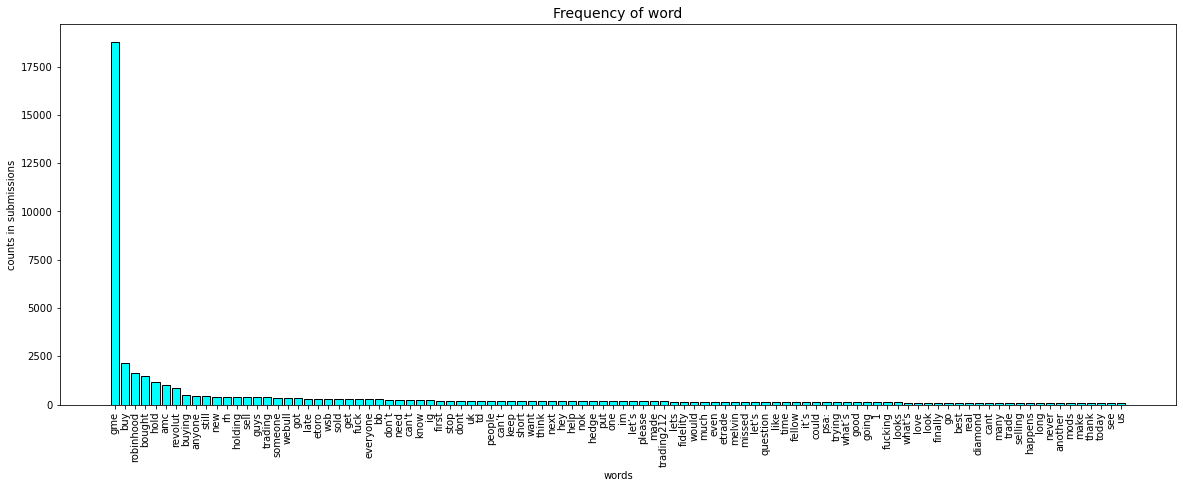

In [16]:
fig, ax = plt.subplots(figsize=(20,7))
ax.bar(frequent['word'], frequent['count'], color="cyan", edgecolor = 'black')
ax.set_xlabel("words")
ax.set_ylabel("counts in submissions")
ax.set_title ("Frequency of word", size=14)
plt.xticks(rotation='vertical')
plt.show()

gme is clearly an outlier, but let's keep it for the moment

# Word cloud

In [17]:
data = dict(zip(frequent['word'].tolist(), frequent['count'].tolist()))

print(data)

{'gme': 18768, 'buy': 2168, 'robinhood': 1653, 'bought': 1490, 'hold': 1170, 'amc': 1011, 'revolut': 859, 'buying': 482, 'anyone': 456, 'still': 435, 'new': 410, 'rh': 390, 'holding': 376, 'sell': 373, 'guys': 368, 'trading': 367, 'someone': 353, 'webull': 349, 'got': 331, 'late': 307, 'etoro': 304, 'wsb': 303, 'sold': 294, 'get': 282, 'fuck': 281, 'everyone': 265, 'bb': 263, 'don’t': 242, 'need': 242, "can't": 235, 'know': 223, 'ig': 210, 'first': 209, 'stop': 206, 'dont': 204, 'uk': 203, 'td': 203, 'people': 202, 'can’t': 201, 'keep': 199, 'short': 198, 'want': 197, 'think': 194, 'next': 188, 'hey': 181, 'help': 180, 'nok': 179, 'hedge': 179, 'put': 177, 'one': 174, 'im': 171, 'let’s': 171, 'please': 171, 'made': 168, 'trading212': 158, 'lets': 155, 'fidelity': 152, 'would': 140, 'much': 134, 'even': 131, 'etrade': 130, 'melvin': 129, 'missed': 129, "let's": 128, 'question': 127, 'like': 126, 'time': 125, 'fellow': 123, 'it’s': 120, 'could': 117, 'psa:': 117, 'trying': 116, 'what’s':

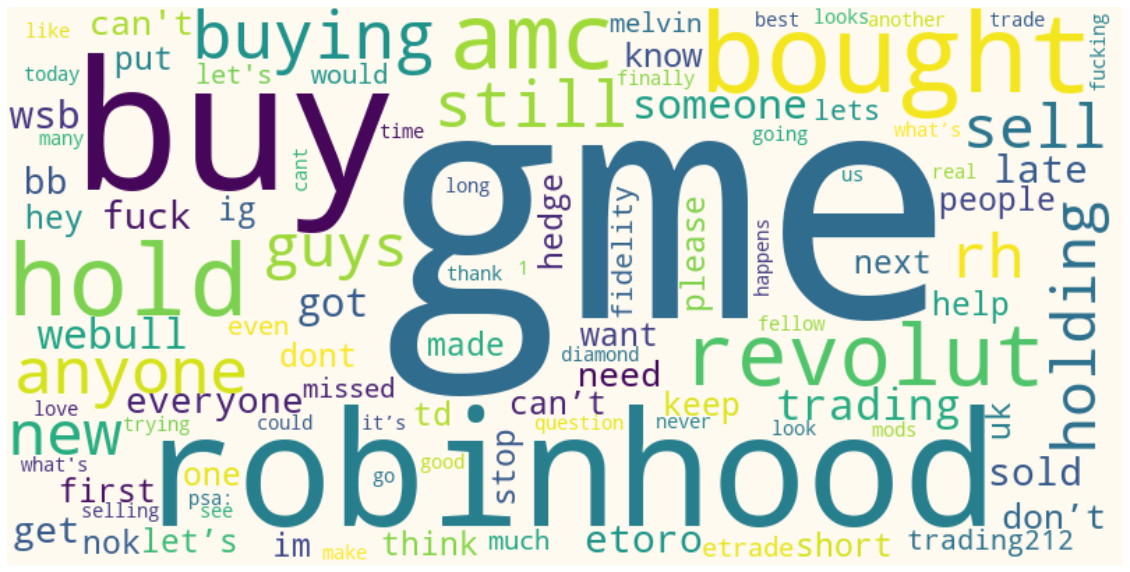

In [18]:
wordcloud = WordCloud(width=800, height=400, background_color='floralwhite').generate_from_frequencies(data)
plt.figure(figsize=(20, 20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# We have to deal with emoji so we convert the presence of an emoji into the corresponding wsb lingo word

to do this, if there is the prescence at least once in the title of an emoji it will be converted into the corresponding wsb lingo. For istances like 'paper hands' or 'diamond hands' or 'to the moon' it will be sufficient the presence of at least one of the emojis

In [8]:
emoji=('🚀':' moon ', '🌑':' moon ', '🌙':' moon ', '🌒':' moon ', '🌕':' moon ', '💎': ' diamond ', '🙌':' hands ',
       '🖐🏼':' hands ', '✋':' hands ', '🤲':' hands ', '🌈🐻':' gay-bears ', '🌈 🐻':' gay-bears ', '💠':' paper ',
       '🥜':' nuts ', '🔥':' on-fire ')

SyntaxError: invalid syntax (<ipython-input-8-5b2238053226>, line 1)

In [7]:
sub_df['title']=sub_df['title'].str.replace('🚀',' moon ')
sub_df

,Unnamed: 0,created,author,title,url
0,0,2020-12-29 23:55:35,WallStWarlock,gme sign quazar,https://i.redd.it/dq3xofxnh7861.png
1,1,2020-12-29 23:27:43,Cali_Godbod,5th trade: gme gang rise,https://www.reddit.com/r/wallstreetbets/commen...
2,2,2020-12-29 23:23:24,Blitz100000,much invest gme pltr,https://www.reddit.com/r/wallstreetbets/commen...
3,3,2020-12-29 23:08:23,kunjinn,yesterday celebrating today gutter margin used...,https://www.reddit.com/gallery/kmo6ck
4,4,2020-12-29 22:45:43,Effect_Wild,gme dd look stock stickers moon moon moon ...,https://i.redd.it/6snwzo3857861.jpg
...,...,...,...,...,...
76347,76347,2021-02-08 00:38:50,nxb123,75% gme shares still shorted s3 wrong,https://www.reddit.com/r/wallstreetbets/commen...
76348,76348,2021-02-08 00:36:52,villadejer,soo anyways buy hold amc gme tomorrow,https://www.reddit.com/r/wallstreetbets/commen...
76349,76349,2021-02-08 00:24:19,LuxeZode,real point gme amc,https://www.reddit.com/r/wallstreetbets/commen...
76350,76350,2021-02-08 00:23:25,zakus5599,regardless diamond hands loss porn love commun...,https://www.reddit.com/r/wallstreetbets/commen...


In [ ]:
sub_df['title']=sub_df['title'].str.replace('🌑',' moon ')
sub_df

In [19]:
#filtered=frequent['word'].to_list()
#filtered

In [20]:
# we filter my_b list with the more used values to avoid non-ascii characters and be able to implement the wordcloud
#word_text='.join(my_b)
#word_text

In [21]:
#filter_text = ' '.join((filter(lambda val: val in my_b, filtered)))
#
#filter_text

In [22]:
# we remove the emoji from the list of words afert converting it in a text
#word_text = ' '.join(text)
#word_text

In [23]:
#def remove_emoji(string):
#    emoji_pattern = re.compile("["
#                               u"\U0001F600-\U0001F64F"  # emoticons
#                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
#                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
#                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
#                               u"\U00002500-\U00002BEF"  # chinese char
#                               u"\U00002702-\U000027B0"
#                               u"\U00002702-\U000027B0"
#                               u"\U000024C2-\U0001F251"
#                               u"\U0001f926-\U0001f937"
#                               u"\U00010000-\U0010ffff"
#                               u"\u2640-\u2642"
#                               u"\u2600-\u2B55"
#                               u"\u200d"
#                               u"\u23cf"
#                               u"\u23e9"
#                               u"\u231a"
#                               u"\ufe0f"  # dingbats
#                               u"\u3030"
#                               "]+", flags=re.UNICODE)
#    return emoji_pattern.sub(r'', string)

In [24]:
#no_emoji=remove_emoji(testo)
#no_emoji

In [25]:
# remove all non ascii charachters
#def remove_non_ascii(text):
#    return ''.join(i for i in text if ord(i)<128)
#
#remove_non_ascii(no_emoji)

In [26]:
 # after removing the emojis we convert again the test into a list

In [27]:
#list_no_emoji= re.sub("[^\w]", " ",  no_emoji).split()
#list_no_emoji

In [28]:
#convert clean_text to a sting
#str1 = ' '.join(clean_text)
#str1

In [29]:
# now we process words with wordcloud and we create the cloud

#wordcloud = WordCloud(
#    background_color='white',
#    stopwords=stopwords
#)

In [30]:
#wordcloud.generate(str1)